In [ ]:
from trace_IO import *
from OF_trigger import *
from OF import OptimumFilter  # Replace with actual module path

import matplotlib.pyplot as plt
import numpy as np
import time


sampling_frequency = 3906250


template = np.load("../templates/template_K_alpha_no_baseline.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")
# Parameters

# Initialize Optimum Filter
trigger = OFtrigger(template, noise_psd, sampling_frequency)



In [2]:
import yaml
import numpy as np
import zstandard as zstd
import os
from TraceSimulator import TraceSimulator

def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict

config = read_yaml_to_dict('../archive/config.yaml')
ts = TraceSimulator(config)

In [9]:
trace = ts.generate(E=100, x=-40, y=80, z=-1800, no_noise=True, type_recoil='NR', quantize=True, phonon_only=False)

In [17]:
import numpy as np

# Assuming `trace` is a NumPy array with shape (1, 54, 32768)
# Remove the batch dimension (squeeze) and get the max value along the time axis (axis=1)
max_values = np.max(trace.squeeze(0), axis=1)

# Display the max values for each of the 54 traces
print("Max values for each trace:", max(max_values))



Max values for each trace: 30


In [7]:
import matplotlib.pyplot as plt

def plot_trace_set(trace_set, offset=50):
    """
    Plot a single trace set (shape: 54 x N) with vertical offsets.

    Parameters:
    - trace_set: ndarray, shape (54, N)
    - offset: float, vertical offset between channels
    """
    n_channels, n_samples = trace_set.shape

    for i in range(n_channels):
        color = 'r' if i > 44 else 'b'
        plt.plot(np.arange(n_samples), trace_set[i] + i * offset, color=color, lw=0.2)

    plt.xlabel("Sample Index")
    plt.yticks([])
    plt.ylim(-10, offset * n_channels)
    plt.title("Trace Set")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [11]:
float16_trace = np.asarray(trace, dtype=np.float16)

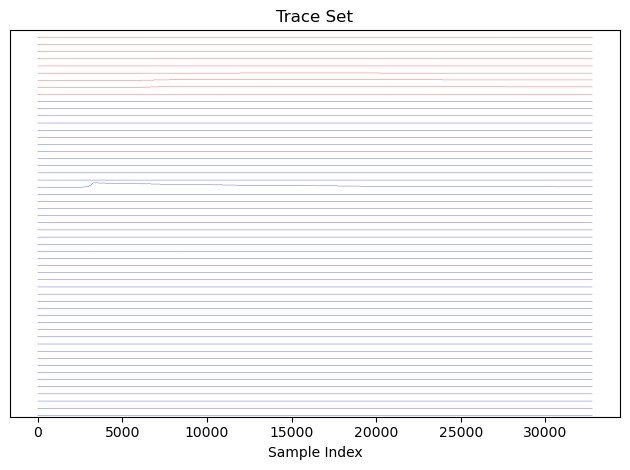

In [12]:
plot_trace_set(float16_trace[0])

In [14]:

amps = [trigger.fit_with_shift(trace)[0] for trace in float16_trace[0]]



In [16]:
max(amps)

26.641112177204935

In [ ]:
max()